In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv(r'C:\Users\hp\Downloads\INFOSYS.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,10-07-2018,275.90,277.80,272.55,274.55,274.75,1284523,3532.63
1,09-07-2018,268.25,276.20,267.00,275.30,275.25,2267486,6168.10
2,06-07-2018,269.80,273.25,265.70,266.20,266.30,2022333,5443.53
3,05-07-2018,277.45,282.40,270.00,271.80,271.25,2338411,6459.01
4,04-07-2018,281.00,281.00,275.35,277.70,277.30,3598212,9999.82


C:\Users\hp\Anaconda3\envs\tensorflow_env\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


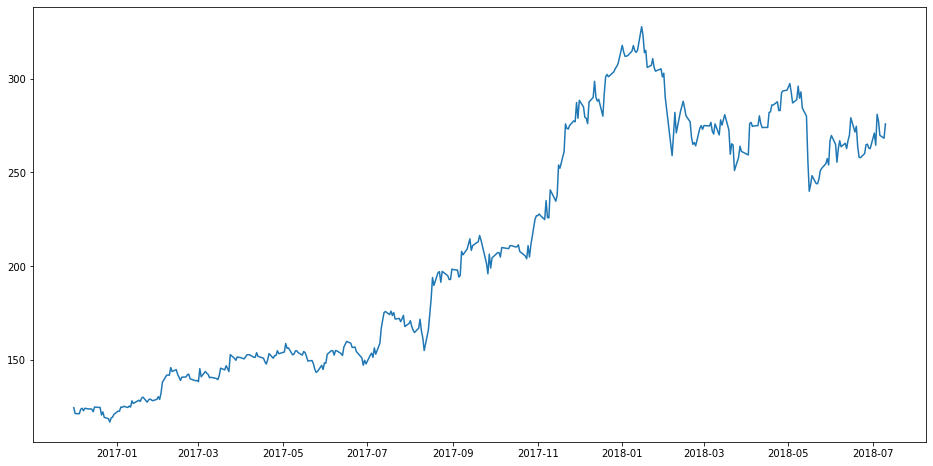

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Open'], label='Close Price history')

In [3]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Open'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Open'][i] = data['Open'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:300,:]
valid = dataset[300:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=30, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 41s - loss: 0.0089
Epoch 2/30
 - 26s - loss: 0.0033
Epoch 3/30
 - 29s - loss: 0.0031
Epoch 4/30
 - 29s - loss: 0.0030
Epoch 5/30
 - 31s - loss: 0.0020
Epoch 6/30
 - 33s - loss: 0.0027
Epoch 7/30
 - 30s - loss: 0.0017
Epoch 8/30
 - 28s - loss: 0.0015
Epoch 9/30
 - 27s - loss: 0.0019
Epoch 10/30
 - 30s - loss: 0.0015
Epoch 11/30
 - 29s - loss: 0.0017
Epoch 12/30
 - 29s - loss: 0.0015
Epoch 13/30
 - 28s - loss: 0.0013
Epoch 14/30
 - 26s - loss: 0.0012
Epoch 15/30
 - 32s - loss: 0.0013
Epoch 16/30
 - 24s - loss: 0.0010
Epoch 17/30
 - 27s - loss: 0.0014
Epoch 18/30
 - 26s - loss: 0.0012
Epoch 19/30
 - 22s - loss: 0.0012
Epoch 20/30
 - 30s - loss: 9.1267e-04
Epoch 21/30
 - 24s - loss: 0.0012
Epoch 22/30
 - 25s - loss: 9.1525e-04
Epoch 23/30
 - 27s - loss: 8.3417e-04
Epoch 24/30
 - 28s - loss: 0.0011
Epoch 25/30
 - 33s - loss: 0.0012
Epoch 26/30
 - 30s - loss: 

In [4]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

9.85252322926488

C:\Users\hp\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


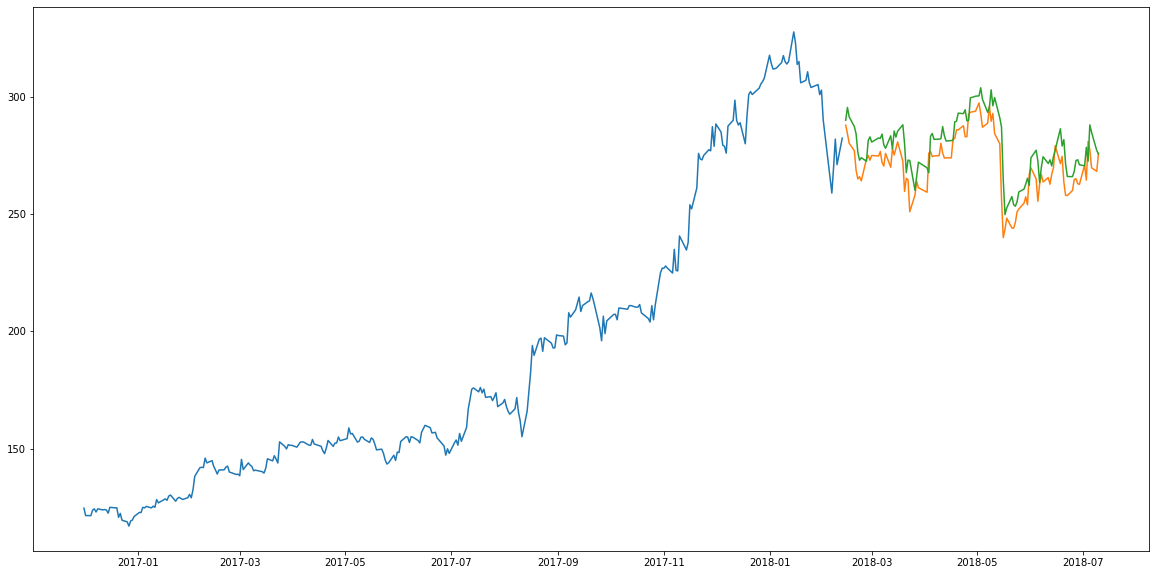

In [11]:
#for plotting
train = new_data[:300]
valid = new_data[300:]
valid['Predictions'] = closing_price
plt.figure(figsize=(20,10))
plt.plot(train['Open'])
plt.plot(valid[['Open','Predictions']])

In [12]:
arr = np.array(closing_price)
close = pd.DataFrame(data=arr.flatten())
close.to_csv('submissionopenwi.csv', index=False)

In [13]:
submission = pd.read_csv('submissionopenwi.csv')
submission.head(100)

,0
0,290.05307
1,295.51492
2,291.52356
3,287.31317
4,284.24210
5,276.38160
6,273.00270
7,274.06500
8,272.55020
9,281.40405


In [14]:
import pickle

In [15]:
stockpredmodel=pickle.dumps(model)

In [16]:
new_model=pickle.loads(stockpredmodel)

array([[290.05307],
       [295.51492],
       [291.52356],
       [287.31317],
       [284.2421 ],
       [276.3816 ],
       [273.0027 ],
       [274.065  ],
       [272.5502 ],
       [281.40405],
       [282.94202],
       [280.73242],
       [282.49106],
       [282.30557],
       [284.12003],
       [279.56686],
       [278.08865],
       [283.39163],
       [277.80847],
       [285.45657],
       [282.85513],
       [285.37415],
       [288.11047],
       [280.0394 ],
       [267.71985],
       [273.02045],
       [272.88586],
       [260.1664 ],
       [266.10287],
       [272.15317],
       [269.73422],
       [267.624  ],
       [283.2292 ],
       [284.4185 ],
       [281.9033 ],
       [281.96976],
       [282.21368],
       [287.3416 ],
       [283.37433],
       [281.17502],
       [281.36804],
       [281.48706],
       [289.33795],
       [289.61685],
       [293.0577 ],
       [292.86136],
       [294.51605],
       [289.7968 ],
       [289.9857 ],
       [299.56256],
